In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# CARREGANDO DADOS

In [75]:
dados = pd.read_csv("diabetes.csv", sep=',')
dados

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


# ANALISANDO OS DADOS 

In [76]:
dados.dtypes

6          int64
148        int64
72         int64
35         int64
0          int64
33.6     float64
0.627    float64
50         int64
1          int64
dtype: object

In [77]:
dados.isnull().sum()

6        0
148      0
72       0
35       0
0        0
33.6     0
0.627    0
50       0
1        0
dtype: int64

In [78]:
dados.describe()

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# SEPARADO OS DADOS PREVISORES E CLASSE

In [79]:
data = dados.iloc[:, 1:]
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]
X

,148,72,35,0,33.6,0.627,50
0,85,66,29,0,26.6,0.351,31
1,183,64,0,0,23.3,0.672,32
2,89,66,23,94,28.1,0.167,21
3,137,40,35,168,43.1,2.288,33
4,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...
762,101,76,48,180,32.9,0.171,63
763,122,70,27,0,36.8,0.340,27
764,121,72,23,112,26.2,0.245,30
765,126,60,0,0,30.1,0.349,47


In [80]:
y

,1
0,0
1,1
2,0
3,1
4,0
...,...
762,0
763,0
764,0
765,1


# SEPARANDO DADOS DE TREINO E TESTE

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_train

,148,72,35,0,33.6,0.627,50
658,80,82,31,70,34.2,1.292,27
475,105,80,45,191,33.7,0.711,29
67,95,66,13,38,19.6,0.334,25
762,101,76,48,180,32.9,0.171,63
170,134,70,23,130,35.4,0.542,29
...,...,...,...,...,...,...,...
15,118,84,47,230,45.8,0.551,31
578,197,70,99,0,34.7,0.575,62
123,113,76,0,0,33.3,0.278,23
24,125,70,26,115,31.1,0.205,41


# AJUSTANDO O INTERVALO DOS DADOS

In [82]:
# falar do efeito positivo da normalização para o método do gradiente, demanda menos etapas para convergir
sc = StandardScaler()
sc.fit(X_train)

X_train_scaled = sc.transform(X_train.values)
X_test_scaled = sc.transform(X_test.values)
X_train_scaled

c:\Users\GABRIEL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\GABRIEL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.25758316,  0.67394834,  0.64539131, ...,  0.26995028,
         2.50498706, -0.53780619],
       [-0.47758446,  0.56919953,  1.52266146, ...,  0.20527428,
         0.72783163, -0.36850647],
       [-0.78958394, -0.1640421 , -0.48252746, ..., -1.618589  ,
        -0.42533119, -0.70710592],
       ...,
       [-0.22798487,  0.35970192, -1.29713546, ...,  0.15353348,
        -0.59662328, -0.87640565],
       [ 0.1464145 ,  0.04545551,  0.33208054, ..., -0.13104093,
        -0.81991475,  0.64729189],
       [-0.5711843 ,  0.30732752,  0.14409408, ..., -4.15388831,
         0.30266019, -1.04570537]])

# CRIANDO MODELO PERCEPTRON E TREINANDO

In [83]:
modelo = Perceptron(max_iter=1000, eta0=0.15) 
modelo.fit(X_train, y_train.values.ravel())

Perceptron(eta0=0.15)

# ANALISANDO OS RESULTADOS

In [84]:
y_pred = modelo.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[72  4]
 [38  2]]
0.6379310344827587


# PERCEPTRON MULTICAMADAS

In [85]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# CRAINDO MODELO MULTICAMADAS

In [86]:
modelo = keras.Sequential()
modelo.add(layers.Dense(6, activation='relu'))
modelo.add(layers.Dense(1, activation='sigmoid'))

In [87]:
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
historico = modelo.fit(X_train, y_train, batch_size=16, epochs=1000)

Epoch 1/1000


41/41 [==============================] - 2s 6ms/step - loss: 13.3499 - accuracy: 0.6513
Epoch 2/1000
41/41 [==============================] - 0s 4ms/step - loss: 10.0157 - accuracy: 0.6498
Epoch 3/1000
41/41 [==============================] - 0s 4ms/step - loss: 7.4188 - accuracy: 0.6498
Epoch 4/1000
41/41 [==============================] - 0s 8ms/step - loss: 5.4085 - accuracy: 0.6498
Epoch 5/1000
41/41 [==============================] - 0s 8ms/step - loss: 3.9016 - accuracy: 0.6482
Epoch 6/1000
41/41 [==============================] - 0s 7ms/step - loss: 2.8695 - accuracy: 0.6406
Epoch 7/1000
41/41 [==============================] - 0s 7ms/step - loss: 2.1948 - accuracy: 0.6083
Epoch 8/1000
41/41 [==============================] - 0s 9ms/step - loss: 1.7557 - accuracy: 0.5730
Epoch 9/1000
41/41 [==============================] - 0s 8ms/step - loss: 1.4520 - accuracy: 0.5607
Epoch 10/1000
41/41 [==============================] - 0s 8ms/step - loss: 1.2343 - accuracy: 0.5438
Epoch 11/1

# ANALISANDO EVOLUÇÃO TREINAMENTO

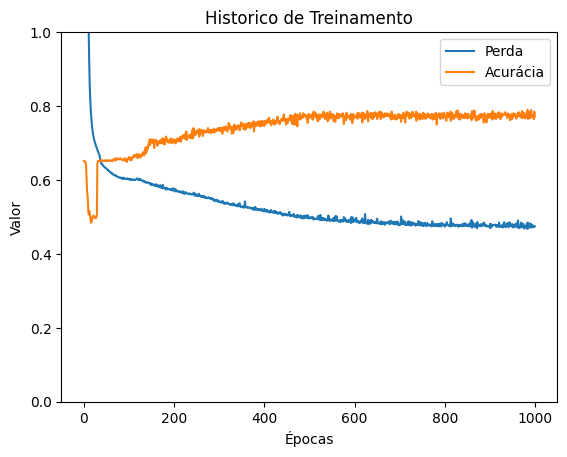

In [88]:
historico.history.keys()
plt.plot(historico.history['loss'], label='Perda')
plt.plot(historico.history['accuracy'], label='Acurácia')

plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.ylim(0, 1) 
plt.title('Historico de Treinamento')

plt.legend()
plt.show()

In [89]:
y_pred = modelo.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

4/4 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

In [90]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[71  5]
 [16 24]]
0.8189655172413793
